<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3d_OSI_SAF_sea_ice_mapping_ice_drift.ipynb" target="_blank"><< Mapping OSI SAF sea ice drift</a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-osi-saf-sea-ice/HEAD?urlpath=%2Ftree%2F1_OSI_SAF_sea_ice_introductory%2F1_4_OSI_SAF_sea_ice_THREDDS.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea ice parameters : Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has no prequisites.

</div>
<hr>

# 1.4 Accessing OSI SAF sea ice data via THREDDS
### Data used 

| Product Description | Product Navigator | OSI SAF website link | OSI SAF Identifier |
|:--------------------:|:-------------:|:-----------------:|:-----------------:|
| Global Sea Ice Concentration (SSMIS) | EO:EUM:DAT:DMSP:OSI-401-B | <a href="https://osi-saf.eumetsat.int/products/osi-401-b" target="_blank">link</a>   | OSI-401-B |


### Learning outcomes

At the end of this notebook you will know;
* How to use THREDDS instead of FTP
* How to open Sea Ice Concentration netcdf
* Map Sea Ice Concentration using cartopy 

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Access Sea Ice data using THREDDS](#section1)
 1. [Explore Sea Ice Data files using THREDDS](#section2)
 1. [Map Sea Ice Data files using THREDDS](#section2)


<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports 
import os                                     # a library that allows us access to basic operating system commands
import xarray as xr                           # a library that supports the use of multi-dimensional arrays in Python
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean                                # colormaps for ocean products
import cmcrameri                              # scientific colormaps for data visualisation

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Access Sea Ice data using THREDDS
[Back to top](#TOC-TOP)

</div>

An alternative solution to FTP data download is to use data served from the THREDDS server from the OSI SAF High Latitude Centre. The THREDDS server allows you to directly access selected dataset without downloading them and does not recquire any authentification.

Many data sets are available (for a full list see; https://thredds.met.no/thredds/osisaf/osisaf.html). Below is an example loading a sea ice concentration data set.

In [2]:
nc = xr.open_dataset("https://thredds.met.no/thredds/dodsC/osisaf/met.no/ice/conc/2022/10/ice_conc_nh_polstere-100_multi_202210061200.nc")

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Explore Sea Ice Data files using THREDDS
[Back to top](#TOC-TOP)

</div>

To explore the dataset you can now simply do the following :

In [3]:
nc

<xarray.Dataset>
Dimensions:                   (time: 1, nv: 2, xc: 760, yc: 1120)
Coordinates:
  * time                      (time) datetime64[ns] 2022-10-06T12:00:00
  * xc                        (xc) float64 -3.845e+03 -3.835e+03 ... 3.745e+03
  * yc                        (yc) float64 5.845e+03 5.835e+03 ... -5.345e+03
    lat                       (yc, xc) float32 ...
    lon                       (yc, xc) float32 ...
Dimensions without coordinates: nv
Data variables:
    Polar_Stereographic_Grid  int32 ...
    time_bnds                 (time, nv) datetime64[ns] ...
    ice_conc                  (time, yc, xc) float32 ...
    ice_conc_unfiltered       (time, yc, xc) float32 ...
    masks                     (time, yc, xc) float32 ...
    confidence_level          (time, yc, xc) float32 ...
    status_flag               (time, yc, xc) float32 ...
    total_uncertainty         (time, yc, xc) float32 ...
    smearing_uncertainty      (time, yc, xc) float32 ...
    algorithm_uncertainty     (time, yc, xc) float32 ...
Attributes: (12/30)
    title:                   Daily Sea Ice Concentration Analysis from OSI SA...
    product_id:              OSI-401
    product_name:            osi_saf_ice_conc
    product_status:          operational
    abstract:                The daily analysis of sea ice concentration is o...
    topiccategory:           Oceans Climatology Meteorology Atmosphere
    ...                      ...
    references:              Product User Manual for OSI SAF Global Sea Ice C...
    history:                 2022-10-07 creation
    product_version:         4.0
    software_version:        1.3
    netcdf_version:          3.6.3
    Conventions:             CF-1.6

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Map sea ice data files using THREDDS
[Back to top](#TOC-TOP)

</div>

Choose a colormap for your data set. You can find more information on matplotlib colormaps <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">here</a>.   
However, we recommend you have a look at <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a> or that you use scientific colormaps for data visulaisation from librairies such as cmcrameri.

In [4]:
cmap = cmcrameri.cm.oslo

Let's map the data in its original projection

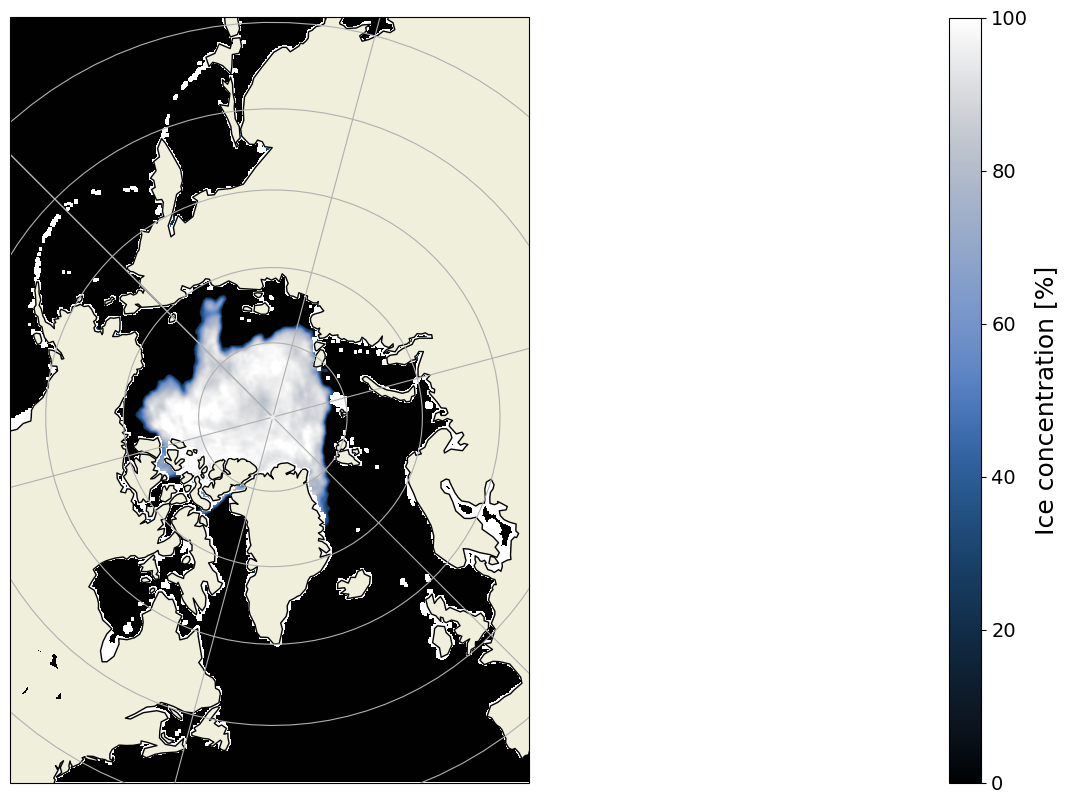

In [5]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0)
output_projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0)

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

# plot data
xc = nc.variables['xc'][:] 
yc = nc.variables['yc'][:]
ice_conc = nc.variables['ice_conc'][:]
confidence_level  = nc.variables['confidence_level'][:]
        
# Sea Ice Concentration data is provided in x y coordinates, bounds need to be defined for cartopy
bounds=(xc.min()*1000,xc.max()*1000,yc.min()*1000,yc.max()*1000)
        
# plotting sea ice
im = ax.imshow(ice_conc[0,:,:], transform=data_projection, extent=bounds, origin='upper', cmap=cmap)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Ice concentration [%]', fontsize=18)
cb.ax.tick_params(labelsize=14)

Close the netcdf file.

In [6]:
nc.close()

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3d_OSI_SAF_sea_ice_mapping_ice_drift.ipynb" target="_blank"><< Mapping OSI SAF sea ice drift</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>